# Imports
<!-- <h1 style="color: #a0d2eb">Imports</h1> -->


In [64]:
import math
import matplotlib.pyplot as plt
from statistics import mean 
import pandas as pd
import numpy as np
import sympy as sym
import random as rand
import pylab as py
from scipy import stats

from sympy import *
from datetime import timedelta
from datetime import datetime

import seaborn as sns
import sklearn
import statsmodels.api as sm
import statistics as stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# About the Dataset

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

<h3 style="color: #a0d2eb "> Goal : accurately predict medical insurance costs</h3>

# EDA

In [65]:
df = pd.read_csv('/Users/tzhang/Desktop/Coding/Regression/Reg_Final_Project/insurance.csv')

1338 Rows

## Distribution of medical insurance charges

/var/folders/d_/03_mdq892hq7j0xngczblt_h0000gn/T/ipykernel_31258/2440664200.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<AxesSubplot: title={'center': 'Medical Insurance Cost Distribution Plot'}, xlabel='charges', ylabel='Density'>

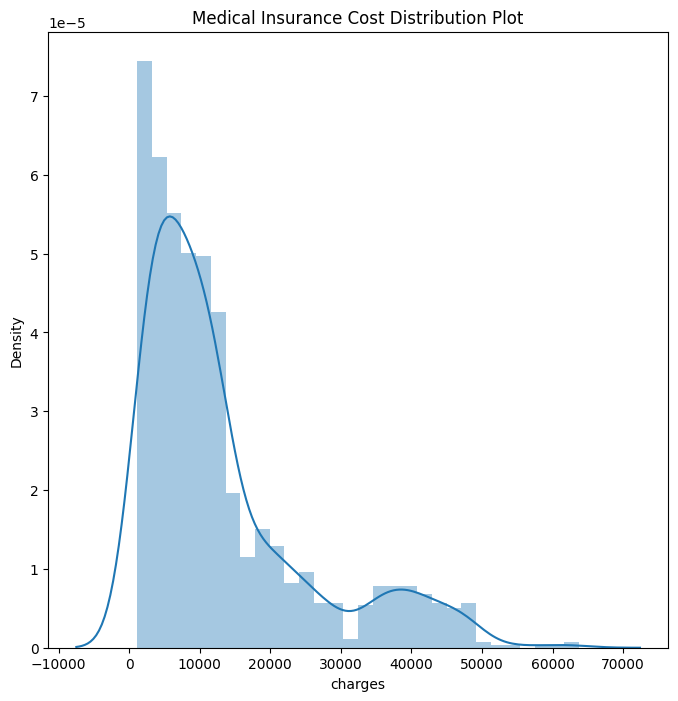

In [66]:
plt.figure(figsize=(8,8))

plt.title('Medical Insurance Cost Distribution Plot')
sns.distplot(df['charges'])

/var/folders/d_/03_mdq892hq7j0xngczblt_h0000gn/T/ipykernel_31258/3262720773.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<AxesSubplot: title={'center': 'Bmi Distribution'}, xlabel='bmi', ylabel='Density'>

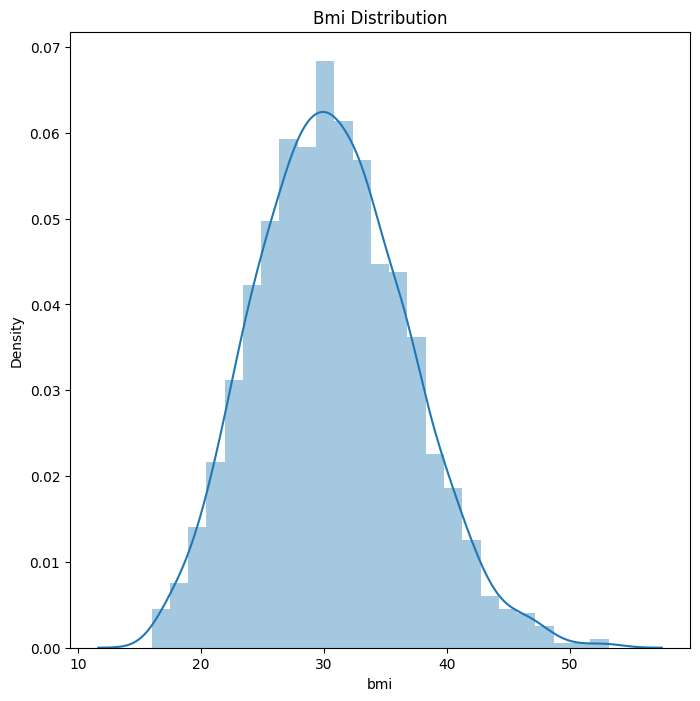

In [67]:
plt.figure(figsize=(8,8))

plt.title('Bmi Distribution')
sns.distplot(df['bmi'])

## Boxplot

(1338, 7)

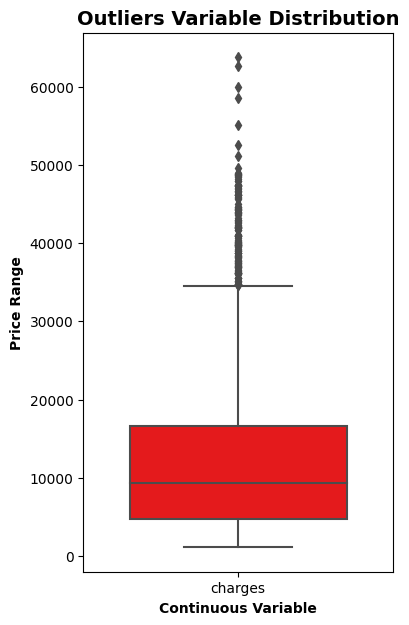

In [68]:
# Boxplot Outlier on Dependent Variable
outliers = ['charges']
plt.rcParams['figure.figsize'] = [4,7]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

## Distribution Plots

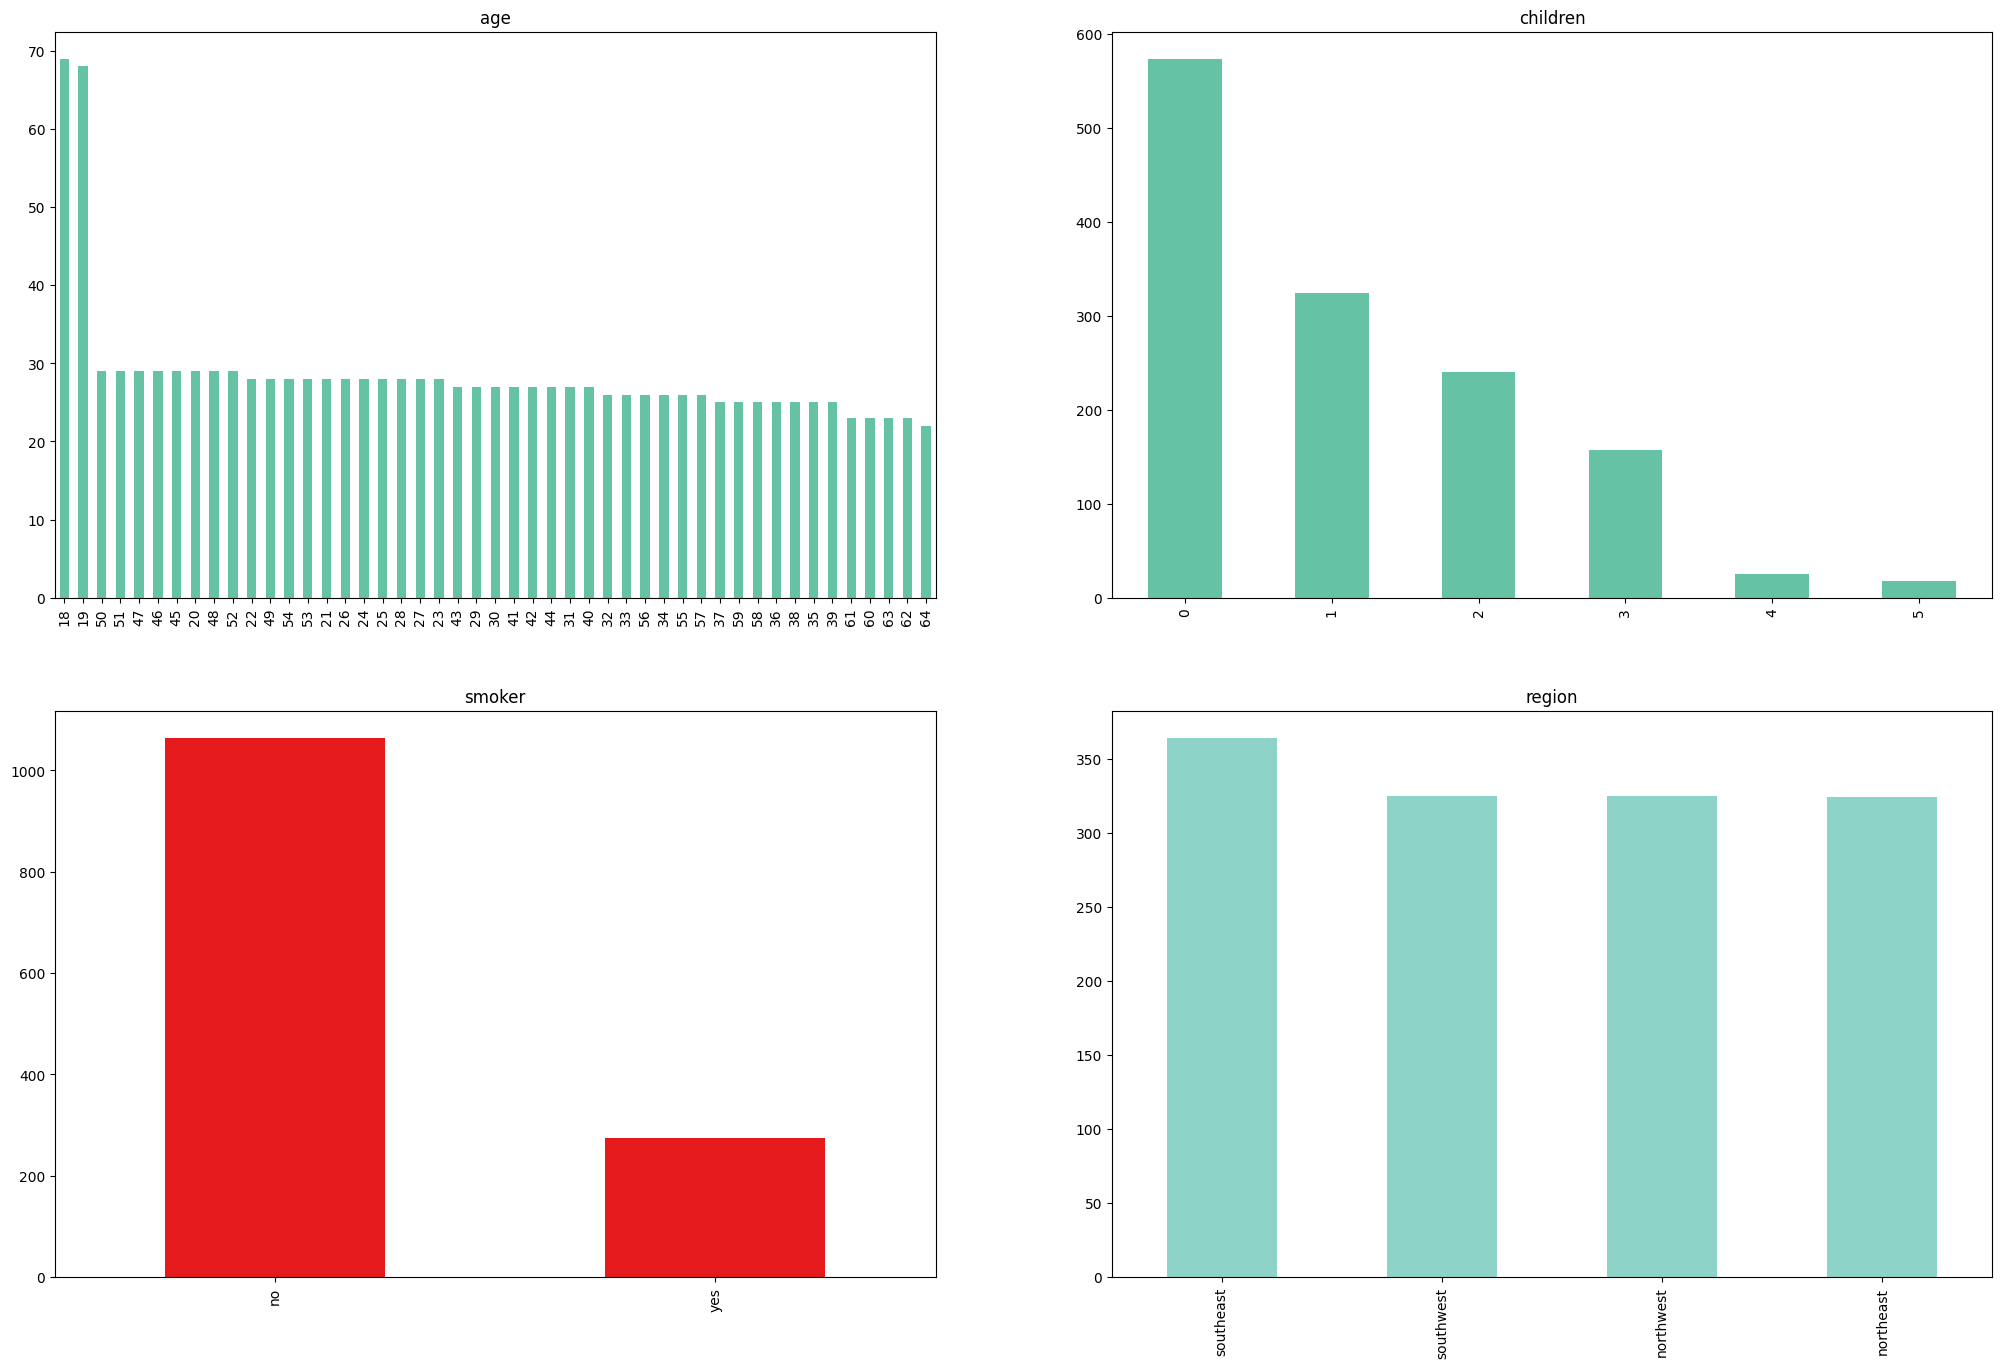

In [69]:
# Distribution Plots
plt.figure(figsize=(25, 25))
plt.subplot(3,2,1)
ax=df['age'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
ax.title.set_text('age')
plt.subplot(3,2,2)
ax=df['children'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
ax.title.set_text('children')
plt.subplot(3,2,3)
ax=df['smoker'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('smoker')
plt.subplot(3,2,4)
ax=df['region'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set3')
ax.title.set_text('region')

## Visualising Categorical Variables with Boxplots


<AxesSubplot: xlabel='region', ylabel='charges'>

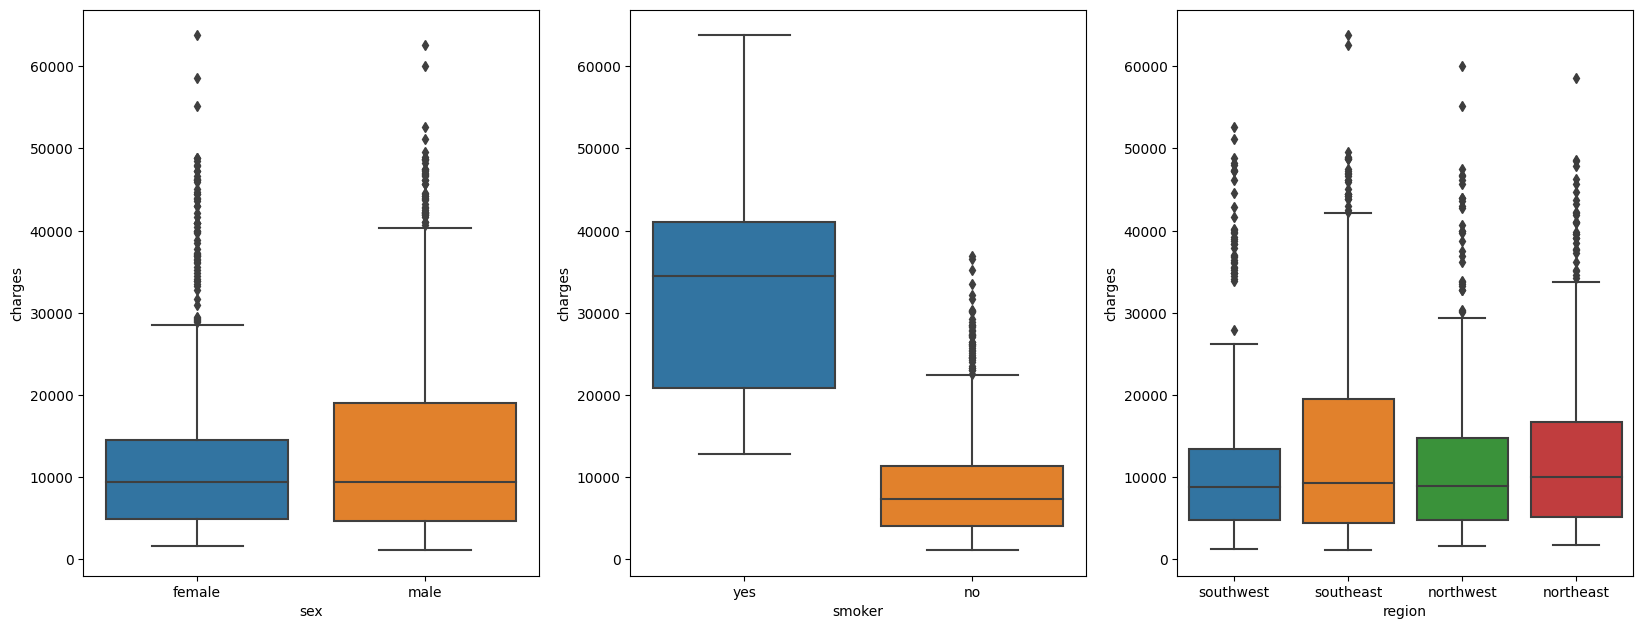

In [70]:
plt.figure(figsize=(20, 25))
plt.subplot(3,3,1)
sns.boxplot(x = 'sex', y = 'charges', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'region', y = 'charges', data = df)


## Corr


In [71]:
df.corr()

/var/folders/d_/03_mdq892hq7j0xngczblt_h0000gn/T/ipykernel_31258/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Y Transformations

In [72]:
df = pd.read_csv('/Users/tzhang/Desktop/Coding/Regression/Reg_Final_Project/insurance.csv')
regions = pd.DataFrame(df.region.value_counts()).index
regionsdummies = pd.get_dummies(df['region'])
df[regions[0]] = regionsdummies[regions[0]]
df[regions[1]] = regionsdummies[regions[1]]
df[regions[2]] = regionsdummies[regions[2]]
df[regions[3]] = regionsdummies[regions[3]]
df.pop('region')
dep_var=[]
for i in df.columns:
    dep_var.append(i)
dep_var.remove('charges')
dep_var

# Y transformations
df['ysquared'] = df.charges.apply(lambda x : x**2)
df['sqrty'] = df.charges.apply(lambda x : math.sqrt(x))
df['logy'] =    df.charges.apply(lambda x : math.log(x))
df['yinverse'] = df.charges.apply(lambda x : 1/x)
df['tri_sqrty'] = df.charges.apply(lambda x : x**(1/3))

# boxcox
df['boxcox_y'] = df.charges.apply(lambda x : x**(0.5050505))
df['inverse_boxcox_x'] = df.charges.apply(lambda x : (1/x**(0.5050505)))

In [73]:
# Function for QQ plot
from scipy import stats

def tmp(Y):
    df_tmp = df.copy()
    ols_func = ''
    for i in dep_var:
        ols_func += i
        ols_func += '+'
    ols_func += '+bmi*smoker+bmi*southeast+children*northwest+children*southwest'
    
    fit = ols(f"{Y} ~ {ols_func}", data=df_tmp).fit()

    # print(ols_func)
    
    plt.subplots(figsize=(6, 4))
    
    stats.probplot(fit.resid, dist="norm", plot= plt)
    plt.title(f"QQplot {Y}")
    plt.show()
    # return fit.summary()


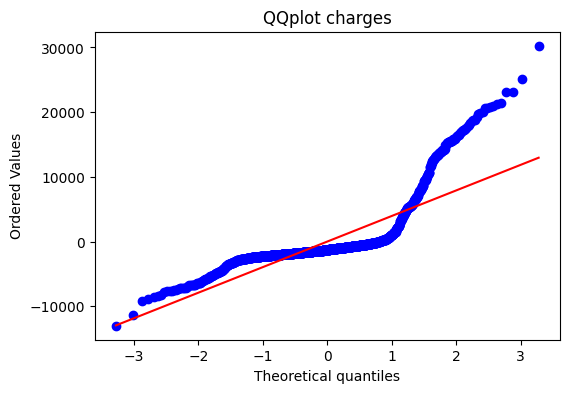

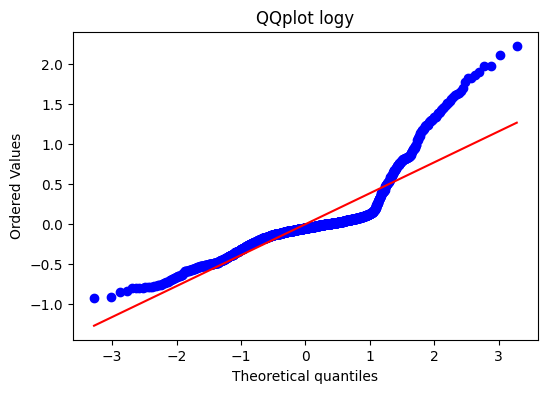

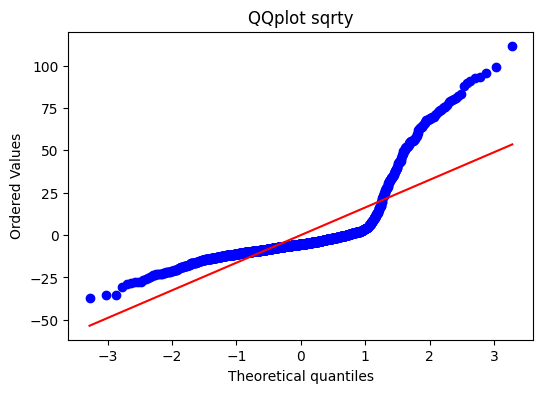

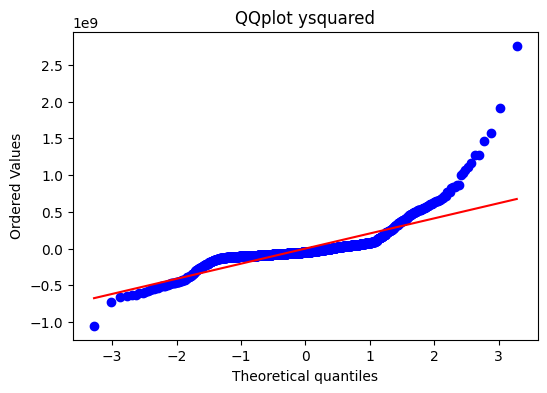

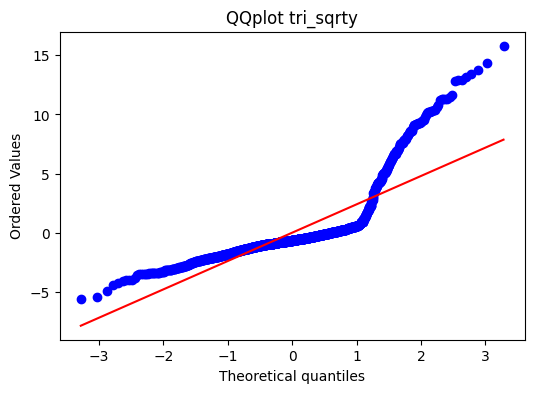

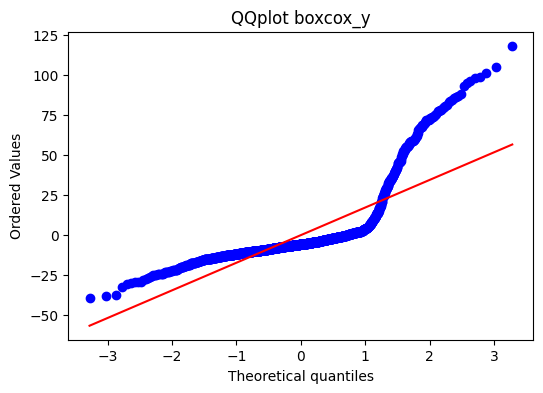

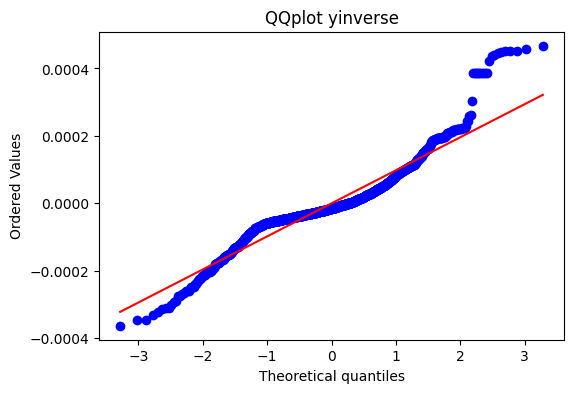

In [74]:
tmp('charges')
tmp('logy')
tmp('sqrty')
tmp('ysquared')
tmp('tri_sqrty')
tmp('boxcox_y')
tmp('yinverse')

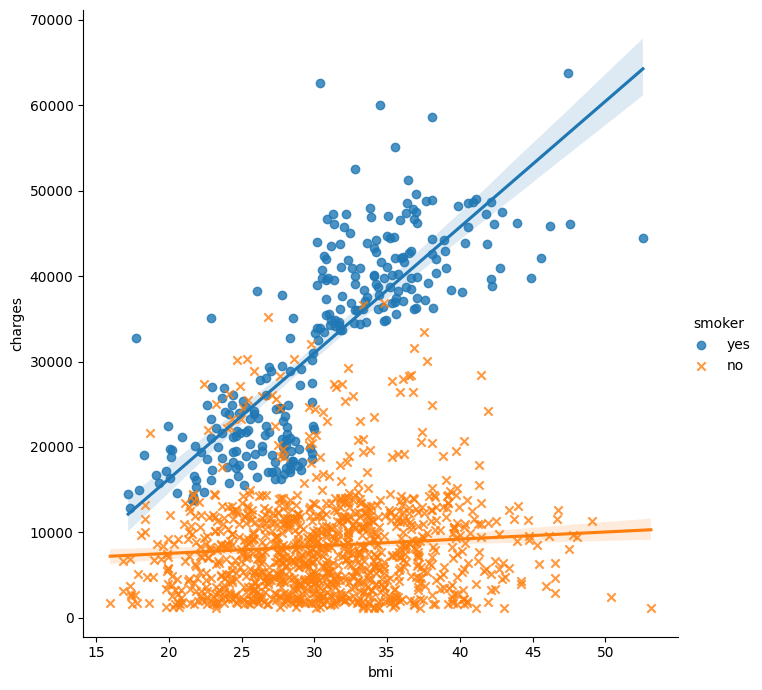

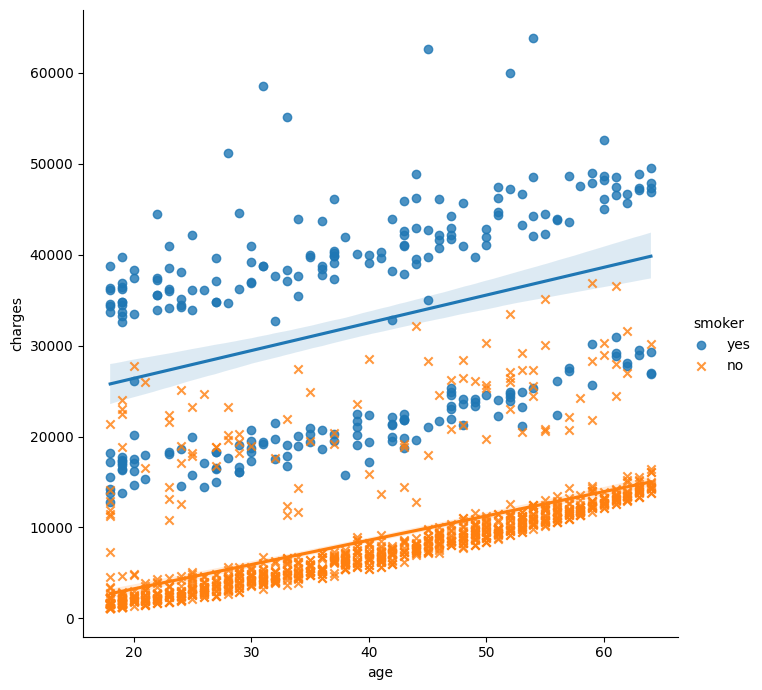

In [75]:

sns.lmplot(data=df , x='bmi', y='charges'  , hue='smoker' , height=7 , markers=['o','x'])
# sns.lmplot(data=df , x='bmi', y='charges'  ,height=7 , markers=['o','x'])
sns.lmplot(data=df , x='age' , y='charges'  , hue='smoker' , height=7 , markers=['o','x'])


In [94]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'southeast',
       'southwest', 'northwest', 'northeast', 'yinverse'],
      dtype='object')

<AxesSubplot: >

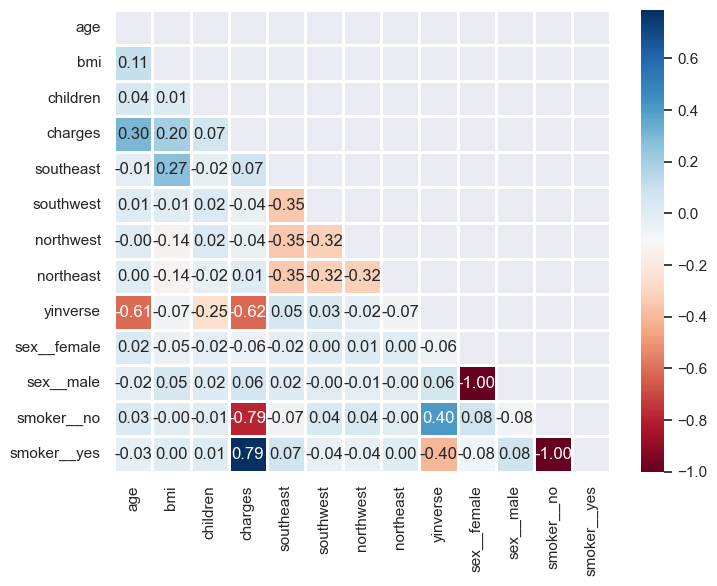

In [93]:
df_dummies = df.copy()
sns.set(rc={'figure.figsize':(8,6)})
for i in df_dummies.columns : 
    if df_dummies[i].dtype == 'object' : 
        dummies = pd.get_dummies(df_dummies[i] , prefix=f'{i}_')
        df_dummies = pd.concat([df_dummies , dummies] , axis=1)
        df_dummies = df_dummies.drop(i , axis=1)
sns.heatmap(df_dummies.corr() ,mask=np.triu(df_dummies.corr()) ,annot=True , fmt='.2f' , cmap='RdBu', linewidths=1)

# Y-inverse

In [77]:
df = pd.read_csv('/Users/tzhang/Desktop/Coding/Regression/Reg_Final_Project/insurance.csv')
df.columns

# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio
np.random.seed(0)
# df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

regions = pd.DataFrame(df.region.value_counts()).index
regionsdummies = pd.get_dummies(df['region'])
df[regions[0]] = regionsdummies[regions[0]]
df[regions[1]] = regionsdummies[regions[1]]
df[regions[2]] = regionsdummies[regions[2]]
df[regions[3]] = regionsdummies[regions[3]]
df.pop('region')
df['yinverse'] = df.charges.apply(lambda x : 1/x)

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)


## Without dropping outliers

                            OLS Regression Results                            
Dep. Variable:               yinverse   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     193.4
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:05   Log-Likelihood:                 8576.2
No. Observations:                1070   AIC:                        -1.711e+04
Df Residuals:                    1050   BIC:                        -1.701e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

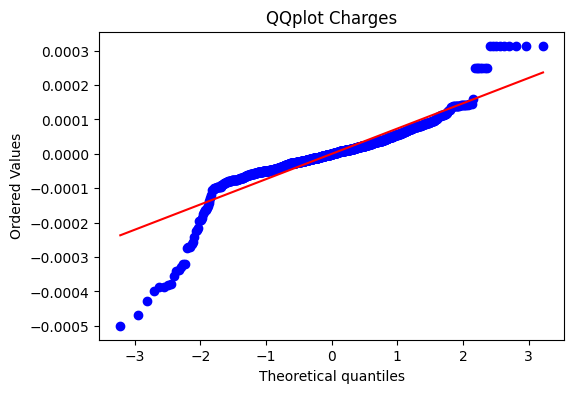

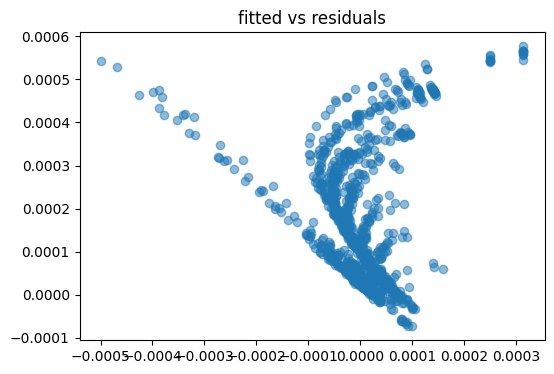

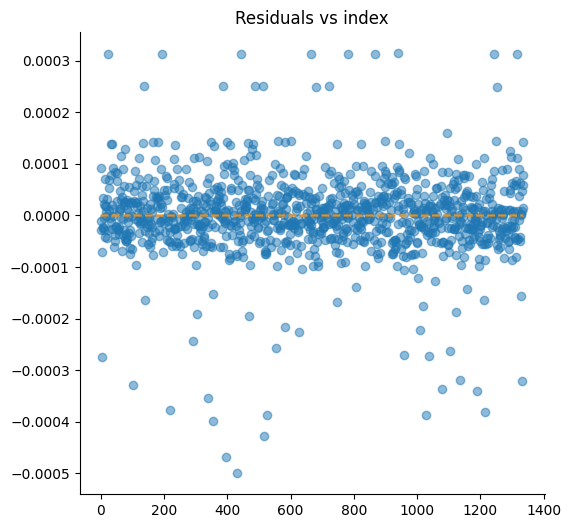

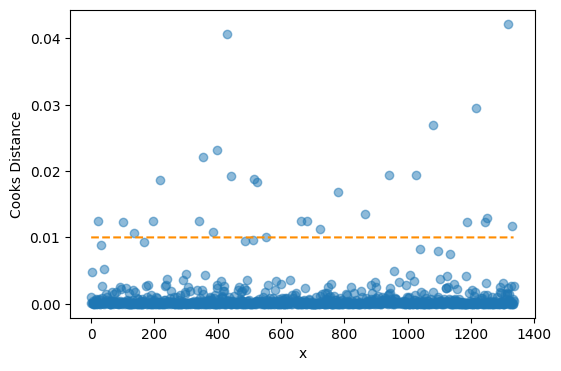

In [78]:
dep_var=[]
for i in df_train.columns:
    dep_var.append(i)
dep_var.remove('charges')
dep_var

from scipy import stats
df_tmp = df_train.copy() 
ols_func = ''
dep_var.remove('yinverse')
for i in dep_var:
    ols_func += i
    ols_func += '+'
# ols_func += 'bmi*smoker+bmi*southeast+children*northwest+children*southwest'
# ols_func += 'bmi*smoker+bmi*southeast'
ols_func += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker+smoker*southwest+smoker*northeast'

fit = ols(f'yinverse ~ {ols_func}', data=df_tmp).fit()

print(fit.summary())

print(ols_func)

plt.subplots(figsize=(6, 4))
stats.probplot(fit.resid, dist="norm", plot= plt)
plt.title(f"QQplot Charges")
plt.show()

plt.subplots(figsize=(6, 4))
plt.scatter(fit.resid,fit.fittedvalues, alpha=0.5)
plt.title('fitted vs residuals')
plt.show()

plt.subplots(figsize=(6, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_train.index, y=fit.resid, alpha=0.5)
plt.plot(np.repeat(0, df_train.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals vs index')
plt.show()  

influence = fit.get_influence()
standardized_residuals = influence.resid_studentized_internal
standardized_residuals
cooks = influence.cooks_distance
cooks
plt.subplots(figsize=(6, 4))
plt.scatter(df_train.index, cooks[0], alpha=0.5)
plt.plot(np.repeat(0.01, df_train.index.max()), color='darkorange', linestyle='--')
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

## Dropping Outliers

### Foward Selection

In [79]:
df_drop_outliers = df_train.copy()
df_drop_outliers['cooks'] = cooks[0]
outliers = df_drop_outliers[df_drop_outliers['cooks'] > 0.01].index
df_drop_outliers.drop(outliers,inplace=True)

from scipy import stats
df_tmp = df_drop_outliers.copy() 
ols_func = ''
# dep_var.remove('yinverse')
for i in dep_var:
    ols_func += i
    ols_func += '+'
    
ols_func1 = ols_func
ols_func2 = ols_func
ols_func3 = ols_func
ols_func4 = ols_func
ols_func5 = ols_func
ols_func6 = ols_func
ols_func7 = ols_func
ols_func8 = ols_func
ols_func9 = ols_func


In [80]:
ols_func1 += 'bmi*smoker'
ols_func2 += 'bmi*smoker+bmi*southeast+children*northwest+children*southwest'
ols_func3 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+age*northwest+age*northeast'
ols_func4 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+age*northwest+sex*smoker'
ols_func5 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker'
ols_func6 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker'
ols_func7 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker+smoker*southwest'
ols_func8 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker+smoker*southwest+smoker*northeast'
ols_func9 += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker+smoker*southwest'

print('ols_func1:', ols(f'yinverse ~ {ols_func1}', data=df_tmp).fit().rsquared)
print('ols_func2:', ols(f'yinverse ~ {ols_func2}', data=df_tmp).fit().rsquared)
print('ols_func3:', ols(f'yinverse ~ {ols_func3}', data=df_tmp).fit().rsquared)
print('ols_func4:', ols(f'yinverse ~ {ols_func4}', data=df_tmp).fit().rsquared)
print('ols_func5:', ols(f'yinverse ~ {ols_func5}', data=df_tmp).fit().rsquared)
print('ols_func6:', ols(f'yinverse ~ {ols_func6}', data=df_tmp).fit().rsquared)
print('ols_func7:', ols(f'yinverse ~ {ols_func7}', data=df_tmp).fit().rsquared)
print('ols_func8:', ols(f'yinverse ~ {ols_func8}', data=df_tmp).fit().rsquared)
print('ols_func9:', ols(f'yinverse ~ {ols_func9}', data=df_tmp).fit().rsquared)

ols_func1: 0.6901385392476053
ols_func2: 0.6903903062739283
ols_func3: 0.8368847478952243
ols_func4: 0.8375954646289582
ols_func5: 0.8390572866553315
ols_func6: 0.8528705178084034
ols_func7: 0.8538377176754259
ols_func8: 0.8541429448087012
ols_func9: 0.8538377176754259


In [81]:
print('ols_func8:\n', ols(f'yinverse ~ {ols_func8}', data=df_tmp).fit().summary())
print('\n\nols_func9:\n\n', ols(f'yinverse ~ {ols_func9}', data=df_tmp).fit().summary())

ols_func8:
                             OLS Regression Results                            
Dep. Variable:               yinverse   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     315.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:05   Log-Likelihood:                 8684.1
No. Observations:                1042   AIC:                        -1.733e+04
Df Residuals:                    1022   BIC:                        -1.723e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept 

### Final Model - Model 9

In [82]:
outliers = df_drop_outliers[df_drop_outliers['cooks'] > 0.01]
outliers

,age,sex,bmi,children,smoker,charges,southeast,southwest,northwest,northeast,yinverse,cooks


age+sex+bmi+children+smoker+southeast+southwest+northwest+northeast+age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker+smoker*southwest
                            OLS Regression Results                            
Dep. Variable:               yinverse   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     332.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:05   Log-Likelihood:                 8683.0
No. Observations:                1042   AIC:                        -1.733e+04
Df Residuals:                    1023   BIC:                        -1.723e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
               

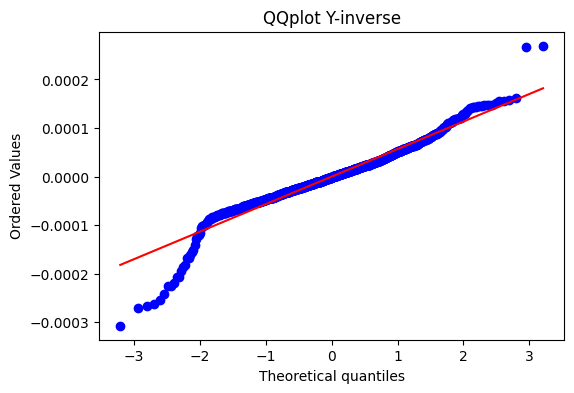

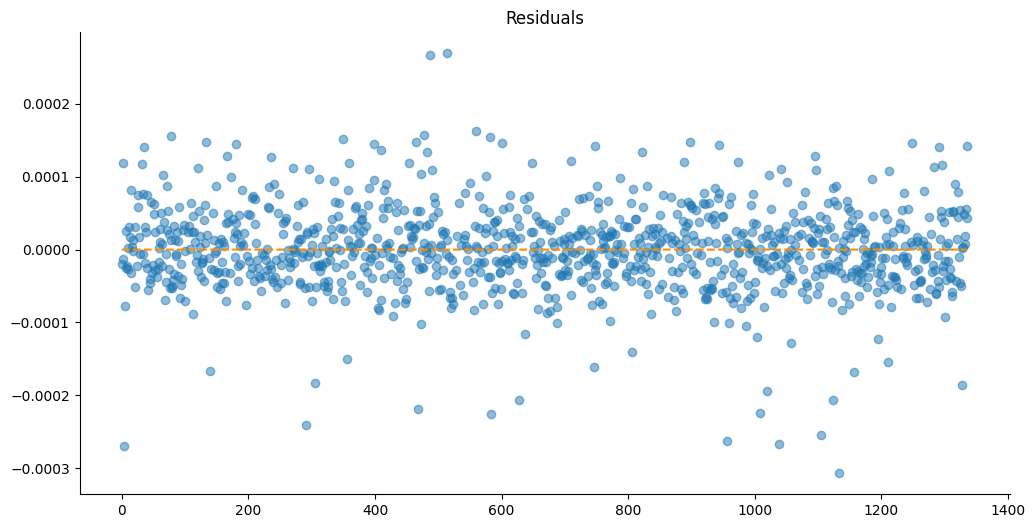

50% of Critical_F_value_05:  0.474846015


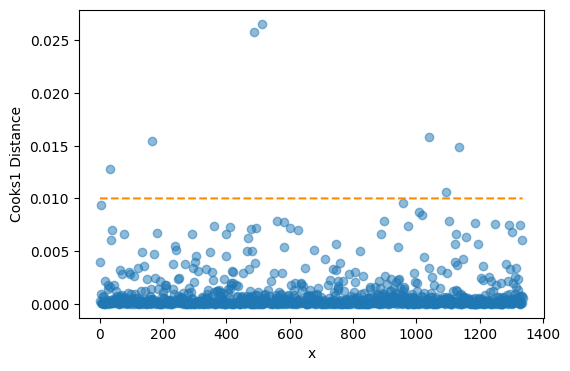

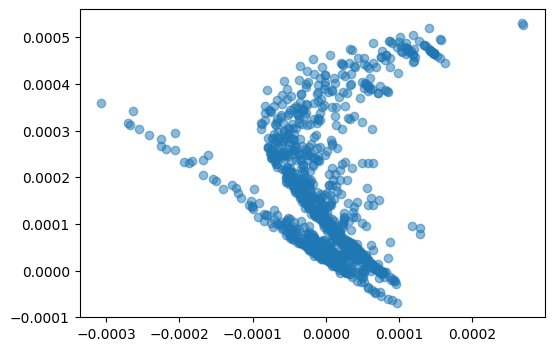

In [83]:
# df['yinverse'] = df.charges.apply(lambda x : 1/x)

df_drop_outliers = df_train.copy()
df_drop_outliers['cooks'] = cooks[0]
outliers = df_drop_outliers[df_drop_outliers['cooks'] > 0.01].index
df_drop_outliers.drop(outliers,inplace=True)

from scipy import stats
df_tmp = df_drop_outliers.copy() 
ols_func = ''
# dep_var.remove('yinverse')
for i in dep_var:
    ols_func += i
    ols_func += '+'

ols_func += 'age*sex+age*bmi+age*children+age*smoker+age*southeast+age*southwest+sex*smoker+bmi*bmi*smoker+children*smoker+smoker*southwest'

fit1 = ols(f'yinverse ~ {ols_func}', data=df_tmp).fit()

print(ols_func)
print(fit1.summary())
plt.subplots(figsize=(6, 4))
stats.probplot(fit1.resid, dist="norm", plot= plt)
plt.title(f"QQplot Y-inverse")

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_drop_outliers.index, y=fit1.resid, alpha=0.5)
plt.plot(np.repeat(0, df_drop_outliers.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

# Points with Ci values greater than the 50% point of the F-distribution with p+1 and n-p-1 degrees of freedom be classified as influential points.
# Critical_F_value_005 = 1.72753922
Critical_F_value_05 = 0.94969203
print('50% of Critical_F_value_05: ' ,Critical_F_value_05/2)

influence = fit1.get_influence()
standardized_residuals = influence.resid_studentized_internal
standardized_residuals
cooks1 = influence.cooks_distance
cooks1
plt.subplots(figsize=(6, 4))
plt.scatter(df_drop_outliers.index, cooks1[0], alpha=0.5)
plt.plot(np.repeat(0.01, df.index.max()), color='darkorange', linestyle='--')
plt.xlabel('x')
plt.ylabel('Cooks1 Distance')
plt.show()

plt.subplots(figsize=(6, 4))
plt.scatter(fit1.resid,fit1.fittedvalues, alpha=0.5)
plt.show()

In [84]:
sm.stats.anova_lm(fit1, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,1.720126e-09,1.720126e-09,0.498860,4.801625e-01
smoker,1.0,4.421934e-06,4.421934e-06,1282.420557,1.068065e-182
sex:smoker,1.0,1.810956e-08,1.810956e-08,5.252018,2.212379e-02
age,1.0,1.068030e-05,1.068030e-05,3097.430776,9.267490e-312
age:sex,1.0,1.374337e-08,1.374337e-08,3.985763,4.615099e-02
age:smoker,1.0,2.448354e-06,2.448354e-06,710.055626,3.082049e-119
bmi,1.0,2.797443e-09,2.797443e-09,0.811296,3.679493e-01
bmi:smoker,1.0,2.516842e-08,2.516842e-08,7.299182,7.012699e-03
children,1.0,1.428535e-06,1.428535e-06,414.294465,1.357401e-77
children:smoker,1.0,3.177308e-07,3.177308e-07,92.146214,5.955301e-21


### Test the final Model

In [85]:
y_test = df_test.pop('yinverse')
X_test = df_test
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_test_1.columns]
# Making predictions using the final model
y_pred = fit1.predict(X_test_new)

r2_score(y_test, y_pred)

0.7774920845536888

In [86]:
print(y_test.apply(lambda x:1/x).head(5))
print('\n', y_pred.apply(lambda x:1/x).head(5))

12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: yinverse, dtype: float64

 12      2125.153210
306     3895.139718
318     5613.367912
815     2174.306625
157    12721.084464
dtype: float64
